In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("/content/Walmart.csv")

# **PreProcessing**

In [7]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
df.fillna(0, inplace=True)
df.dropna(inplace=True)

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df.set_index('Date', inplace=True)

# **EDA**

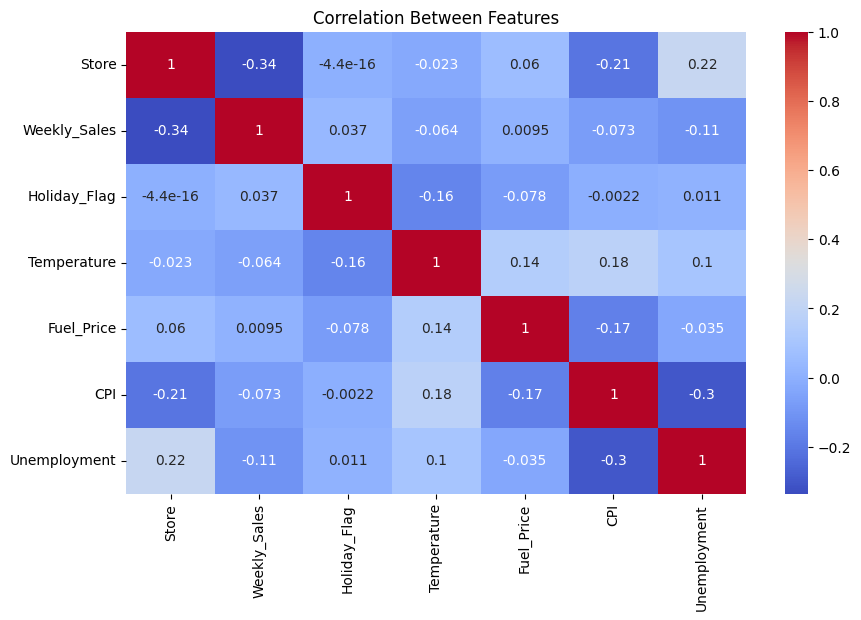

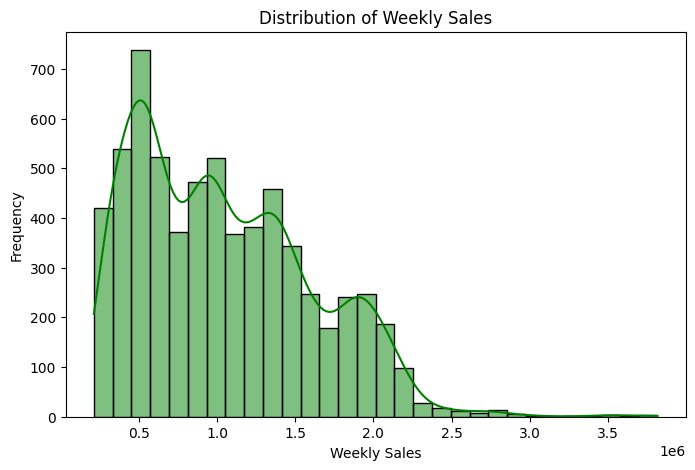

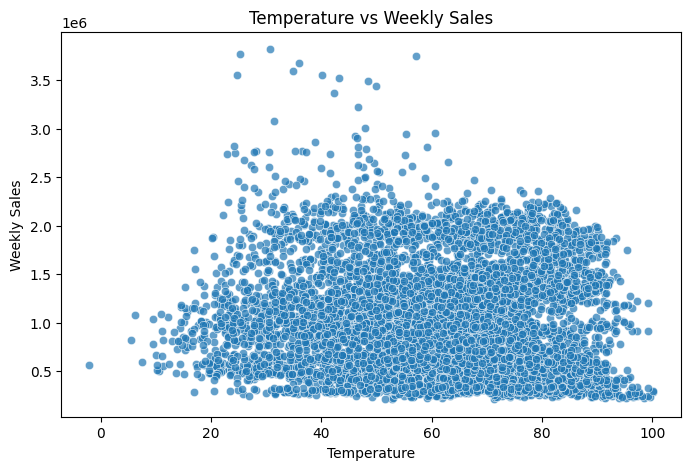

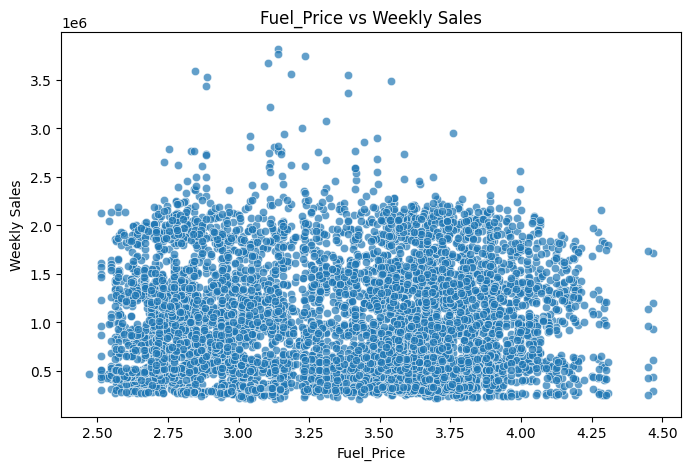

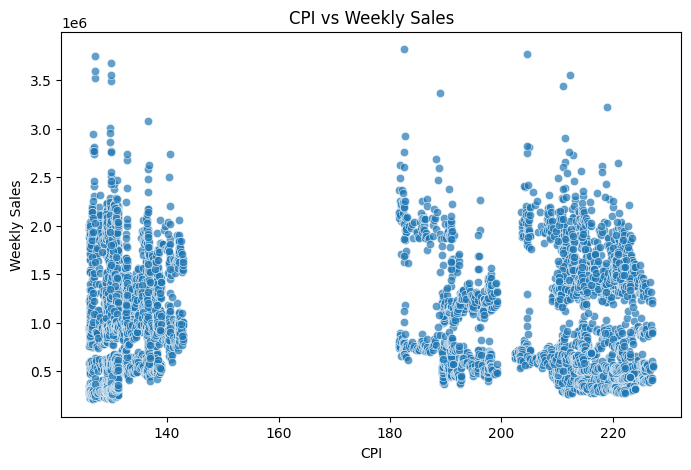

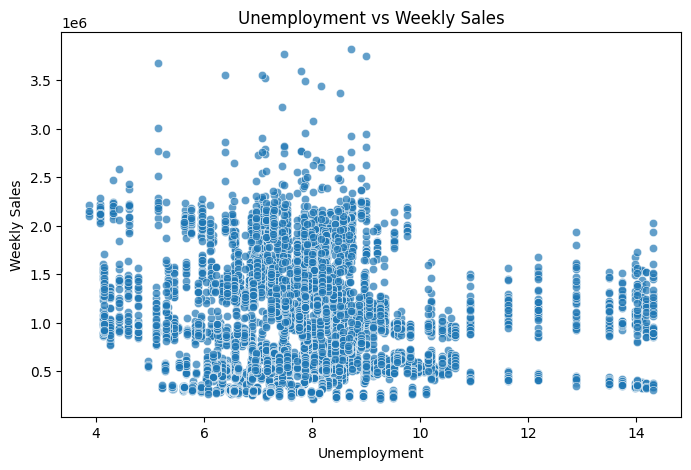

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sales Trends Over Time
if 'Date' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Weekly_Sales'], label='Weekly Sales', color='blue')
    plt.title('Sales Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

# 3. Distribution of Weekly Sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Weekly_Sales'], kde=True, bins=30, color='green')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# 4. Relationship Between Features and Weekly Sales
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for feature in features:
    plt.figure(figsize=(8, 5))
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    sns.scatterplot(data=df, x=feature, y='Weekly_Sales', alpha=0.7)
    plt.title(f'{feature} vs Weekly Sales')
    plt.xlabel(feature)
    plt.ylabel('Weekly Sales')
    plt.show()


# **Test Train Split**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

X = df[features]
y = df[target]

# 3. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the Features (Optional, for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes
print("Training Features Shape:", X_train_scaled.shape)
print("Testing Features Shape:", X_test_scaled.shape)

Training Features Shape: (5148, 6)
Testing Features Shape: (1287, 6)


# **RandomForest**


Mean Absolute Error (MAE): 76707.88178531466
Root Mean Squared Error (RMSE): 146970.26956946138


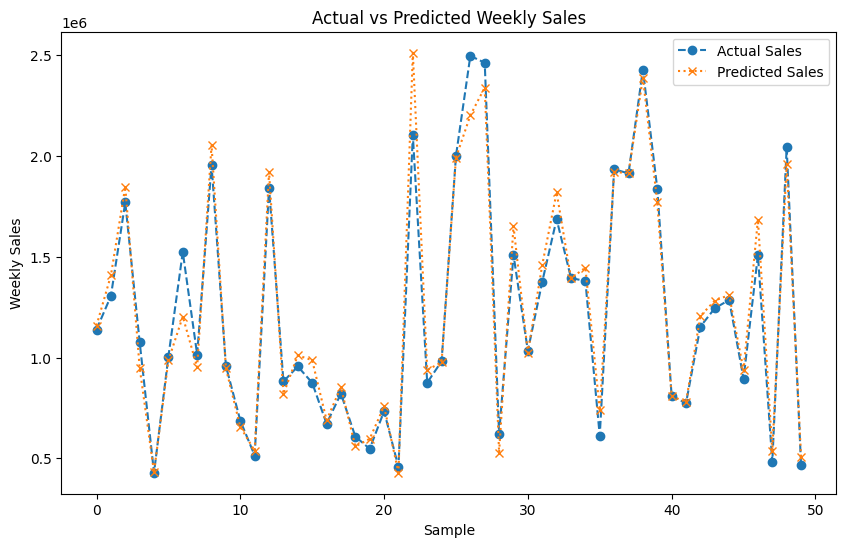

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 2. Make Predictions
y_pred = model.predict(X_test_scaled)

# 3. Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# 4. Visualize Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual Sales', marker='o', linestyle='--')
plt.plot(y_pred[:50], label='Predicted Sales', marker='x', linestyle=':')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Sample')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# **Gradient Boosting Model**

Gradient Boosting - MAE: 138885.31844981265
Gradient Boosting - RMSE: 200969.67491983477


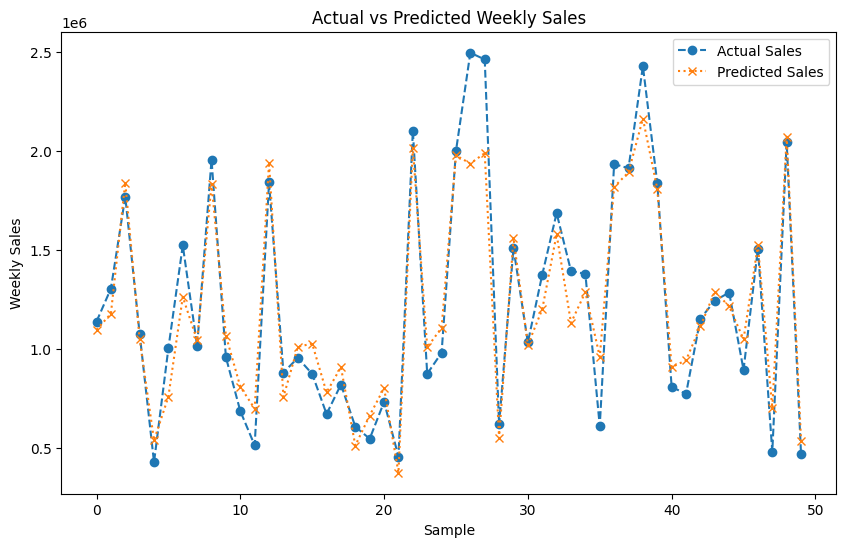

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test_scaled)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print("Gradient Boosting - MAE:", mae_gb)
print("Gradient Boosting - RMSE:", rmse_gb)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual Sales', marker='o', linestyle='--')
plt.plot(y_pred_gb[:50], label='Predicted Sales', marker='x', linestyle=':')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Sample')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()